In [1]:
from api import API


/home/16110083/anaconda3/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
Using TensorFlow backend.
/home/16110083/anaconda3/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/16110083/anaconda3/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {
     'Mean': {},"FHMM_EXACT":{},"RNN":{'n_epochs':50,'batch_size':1024},"Seq2Point":{'n_epochs':50,'batch_size':1024},
      "Seq2Seq":{'n_epochs':50,'batch_size':1024},"DAE":{'n_epochs':50,'batch_size':1024},"WindowGRU":{'n_epochs':30,'batch_size':1024}

  },
'train': {
    'datasets': {
      'Dataport': {
        'path': '../dataport2.hdf5',
        'buildings': {
          54: {
            'start_time': '2015-01-28',
            'end_time': '2015-02-12'
          },
          56: {
            'start_time': '2015-01-28',
            'end_time': '2015-02-12'
          },
          57: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          },
          62: {
            'start_time': '2014-09-06',
            'end_time': '2014-09-20'
          },
          63: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          },
          64: {
            'start_time': '2015-04-14',
            'end_time': '2015-04-28'
          },
          65: {
            'start_time': '2014-09-23',
            'end_time': '2014-10-07'
          },
          69: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          },
          71: {
            'start_time': '2014-12-25',
            'end_time': '2015-01-09'
          },
          72: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          }
        }

      }
    }
  },
  'test': {
    'datasets': {
      'Datport': {
        'path': '../dataport2.hdf5',
        'buildings': {
          94: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          },
          103: {
            'start_time': '2014-01-26',
            'end_time': '2014-02-03'
          },
          113: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          },
          117: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          },
          122: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          }
        }
      }
    },
    'metrics': ['mae']
  }
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
 test New mains shape
(9982, 99, 1)
New testing
Length
9982
Max input
12.941666666666666 -2.875
test predictions  [           fridge  air conditioner  electric furnace  washing machine
0      101.798332         3.798652         22.289995         1.941347
1      102.916214         3.794105         22.268280         1.941347
2      103.940559         3.775960         22.258425         1.953972
3      104.486099         3.757721         22.218296         1.961413
4      104.927101         3.747261         22.159494         1.968534
5      105.308792         3.735740         22.138874         1.972517
6      105.434914         3.718440         22.202965         1.966664
7      104.993385         3.680179         22.272333         1.941347
8      101.926140         3.611916         22.306618         1.941347
9      100.129387         3.540449         21.790232         1.941347
10      98.064888      

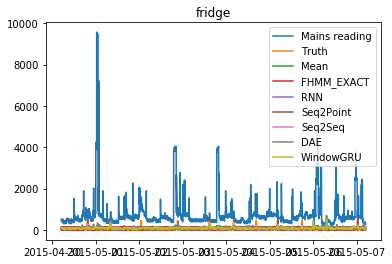

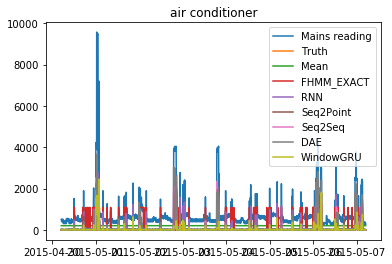

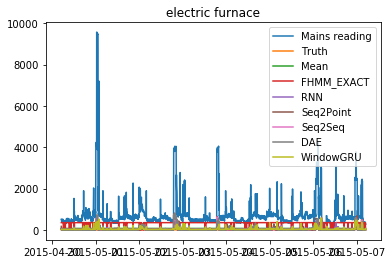

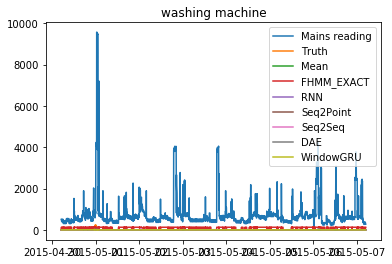

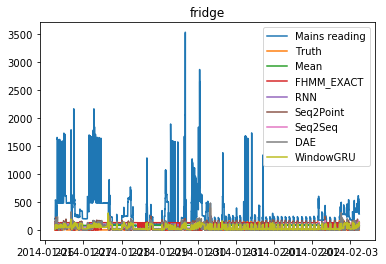

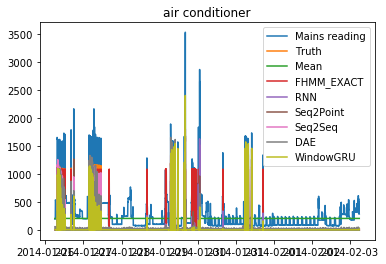

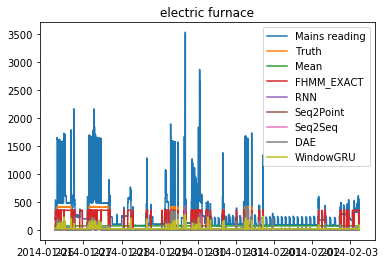

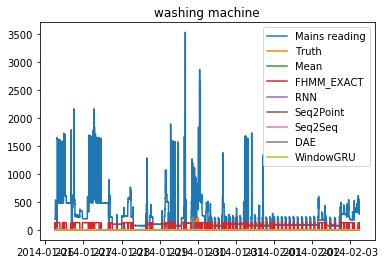

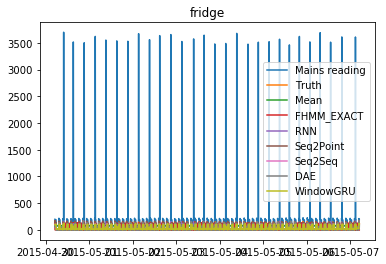

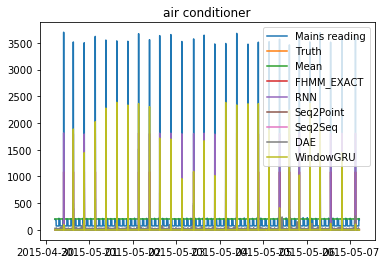

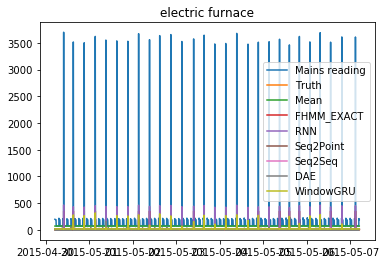

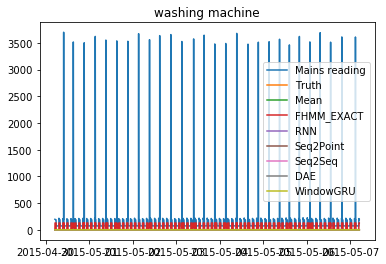

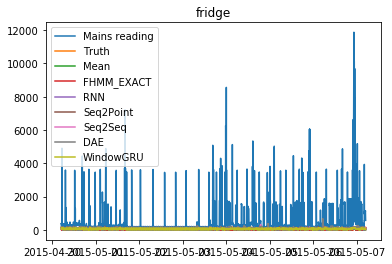

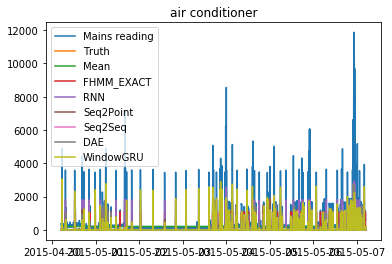

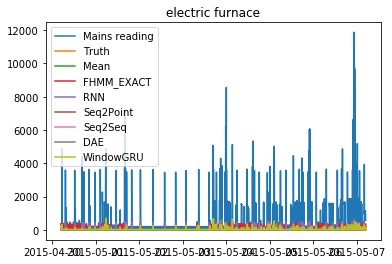

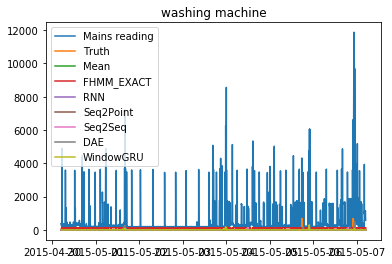

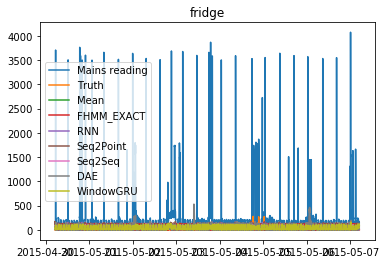

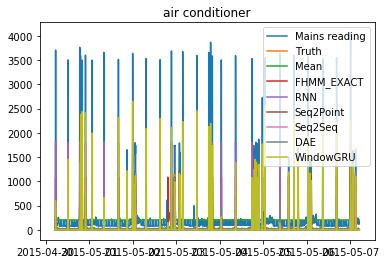

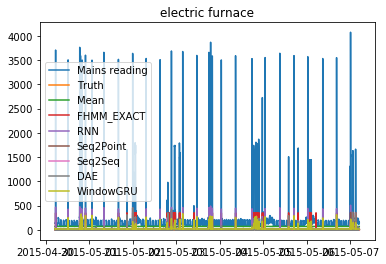

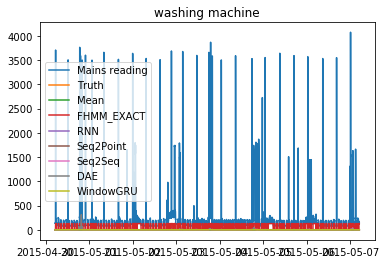

In [3]:
api_res = API(redd)


In [6]:
for i in api_res.errors:
    print (i)
    print ('\n')

                        Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             56.405132   56.203472  49.099785  40.370716  42.784256   
air conditioner   222.787109  130.567368  80.161957  57.352467  71.042953   
electric furnace   73.102295  311.914978  61.297180  28.104620  25.386387   
washing machine     5.046531   85.981049   4.654890   2.176828   2.938090   

                        DAE  WindowGRU  
fridge            52.182293  48.185860  
air conditioner   78.344078  40.030197  
electric furnace  35.177380  32.183540  
washing machine    2.666259   3.440081  


                        Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             74.519279   77.385590  47.064571  26.664778  29.970177   
air conditioner   221.088806   16.440018  17.909105   9.479571  14.176325   
electric furnace  103.222809   61.380989  52.312679  51.814774  54.805294   
washing machine     5.106009   48.256943   3.282319   2.584684   2.132276   

                     

In [7]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("STD")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             63.310463   66.711900  38.405436  23.565027  28.101818   
air conditioner   224.838708   45.558858  46.649465  24.894409  32.343110   
electric furnace   81.581897   95.318022  33.986423  27.592015  27.947805   
washing machine     5.075050   59.994186   3.502417   2.458718   2.361656   

                        DAE  WindowGRU  
fridge            32.241739  28.829542  
air conditioner   39.335076  25.388383  
electric furnace  29.463180  34.516600  
washing machine    3.185204   3.070073  



STD
                       Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             7.772509   23.535001   7.952149  12.153911   9.597700   
air conditioner   16.420339   44.644986  30.662413  20.979565  25.210086   
electric furnace  11.657662  110.551514  20.699020  15.075947  15.339491   
washing machine    0.827776   17.541759   1.251093   0.963076   1.261974   

             